In [1]:
import torch
from torch import optim, nn
from functools import partial
from tqdm import tqdm
from torchinfo import summary
from torch.utils.data import Dataset, DataLoader
import wandb 
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

import sys
from pathlib import Path

# Add the 'src' folder to sys.path
sys.path.append(str(Path().resolve().parent / "src"))

from initialize import *
from classes import *
from train import *
from data_proc import *

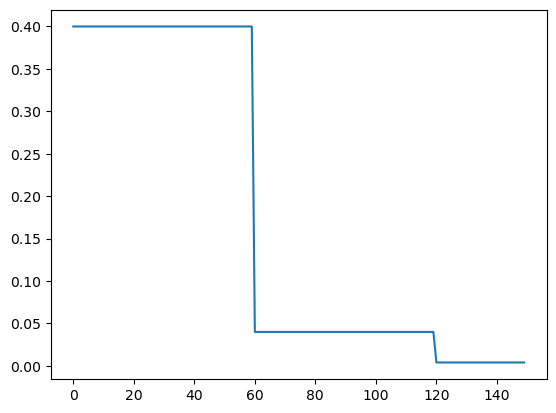

In [4]:
model = torch.nn.Linear(10, 1)
optimizer = setup_optimizer(model.parameters(), lr=4e-1)

n = 60
lr_vals = np.zeros(150)

sheduler = setup_scheduler(optimizer, num_epochs_per_task=20)

for i in range(150):
    lr_vals[i] = optimizer.param_groups[0]["lr"]    
    optimizer.step()
    sheduler.step()


plt.plot(lr_vals)

In [9]:
torch.tensor(range(1, 6), dtype=int) * 3 * 10


tensor([ 30,  60,  90, 120, 150])

[4, 20, 24, 40, 44, 60, 64, 80, 84, 100, 104, 120, 124, 140, 144, 160, 164, 180, 184]


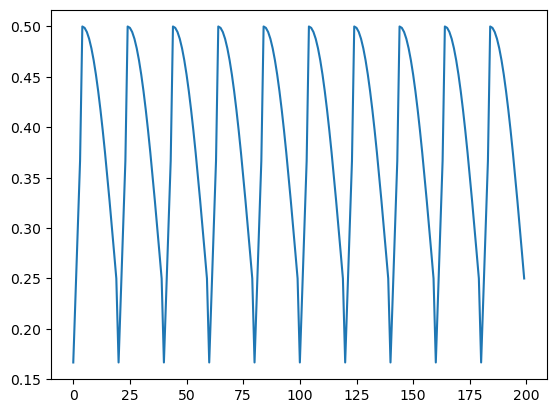

In [49]:
model = torch.nn.Linear(10, 1)
optimizer = setup_optimizer(model.parameters(), lr=5e-1)

num_epochs_per_task = 20
num_tasks = 10
lr_vals = np.zeros(num_epochs_per_task*num_tasks)

warm_up = optim.lr_scheduler.LinearLR(optimizer, start_factor=0.05, total_iters=5)
decay = optim.lr_scheduler.CosineAnnealingLR(optimizer, 20)

list_sched = []
for i in range(num_tasks):
    list_sched.append(optim.lr_scheduler.LinearLR(optimizer))
    # list_sched.append(optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.95))
    list_sched.append(optim.lr_scheduler.CosineAnnealingLR(optimizer, 1.5*num_epochs_per_task))


a = [4, num_epochs_per_task]
for i in range(num_tasks-1):
    a.append(a[-1] + 4)
    a.append(a[-1] + num_epochs_per_task - 4)

a = a[:-1]
print(a)

sheduler = optim.lr_scheduler.SequentialLR(optimizer, list_sched, milestones=a)

for i in range(num_epochs_per_task*num_tasks):
    lr_vals[i] = sheduler.get_last_lr()[0]
    optimizer.step()
    sheduler.step()


plt.plot(lr_vals)